In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Taller Final

por:

- Pinzón, Angela
- Yañez, Andrés

## Punto 1.
Del artı́culo *ALM for insurers with multiple underwriting lines andportfolio constraints: a Lagrangian duality approach*, replique la solución numérica del **ejemplo 2**. Para tal caso, primero construya las gráficas presentadas en el ejemplo y luego halle las soluciones. Ayuda: Construya la función auxiliar $f (κ) = h1 (κ) − h2 (κ)$ y encuentre la raı́z de esa función auxiliar.

#### Replica de graficas
Con parametros de $\eta$ son $0.7$, $1.2$, $1.7$, y $2.2$.

Rendimientos de activos menos la tasa de interés libre de riesgo.
Influencia de la volatilidad y correlaciones entre diferentes activos.
Ajustes por factores de riesgo o penalizaciones por exceder ciertos umbrales de riesgo.

In [83]:
import numpy as np

# Parámetros base
eta = 0.7
q1, q2 = 0.2, 0.6
mu, r = 0.07, 0.03
sigma = 0.21
lambda_ = 0.1
I_2x2 = np.eye(2)  # Matriz identidad 2x2

# Matrices
b = np.array([[0.2, 0.6], [1.3, 0.7]])  # b matriz 2x2
c = np.array([3.0, 3.0]).reshape(2, 1)  # c como un vector columna
p = np.array([0.7, 1.1]).reshape(2, 1)  # p como un vector columna
rho = np.array([0.4, 0.5])  # rho como un vector fila

# Función corregida h1(k)
def h1(k):
    k = np.array([k])  # Asegurarse de que k es un array
    term1 = p[0] + (mu - r) / sigma * np.linalg.norm(np.dot(b, rho.T))**2
    term2 = -eta * np.dot(b, np.dot(I_2x2 - np.outer(rho, rho), b.T)).sum() * k**2
    additional_term = -lambda_ * (
        c[0] * q1 / (1 - k * c[0])**eta +
        c[0] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta
    ).sum()
    return term1 + term2 + additional_term

# Función corregida h2(k)
def h2(k):
    k = np.array([k])  # Asegurarse de que k es un array
    term1 = p[1] + (mu - r) / sigma * np.linalg.norm(np.dot(b, rho.T))**2
    term2 = -eta * np.dot(b, np.dot(I_2x2 - np.outer(rho, rho), b.T)).sum() * k**2
    additional_term = -lambda_ * (
        c[1] * q2 / (1 - k * c[1])**eta +
        c[1] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta
    ).sum()
    return term1 + term2 + additional_term

# Funcion auxiliar para graficar
def f(k):
    return h1(k)- h2(k)

print(f(2))


[nan]


/tmp/ipykernel_20350/3448881180.py:23: RuntimeWarning: invalid value encountered in power
  c[0] * q1 / (1 - k * c[0])**eta +
/tmp/ipykernel_20350/3448881180.py:24: RuntimeWarning: invalid value encountered in power
  c[0] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta
/tmp/ipykernel_20350/3448881180.py:34: RuntimeWarning: invalid value encountered in power
  c[1] * q2 / (1 - k * c[1])**eta +
/tmp/ipykernel_20350/3448881180.py:35: RuntimeWarning: invalid value encountered in power
  c[1] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta


/tmp/ipykernel_20350/1642679461.py:39: RuntimeWarning: invalid value encountered in power
  c[0] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta
/tmp/ipykernel_20350/1642679461.py:38: RuntimeWarning: invalid value encountered in power
  c[0] * q1 / (1 - k * c[0])**eta +
/tmp/ipykernel_20350/1642679461.py:49: RuntimeWarning: invalid value encountered in power
  c[1] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta
/tmp/ipykernel_20350/1642679461.py:48: RuntimeWarning: invalid value encountered in power
  c[1] * q2 / (1 - k * c[1])**eta +


TypeError: Input z must be 2D, not 4D

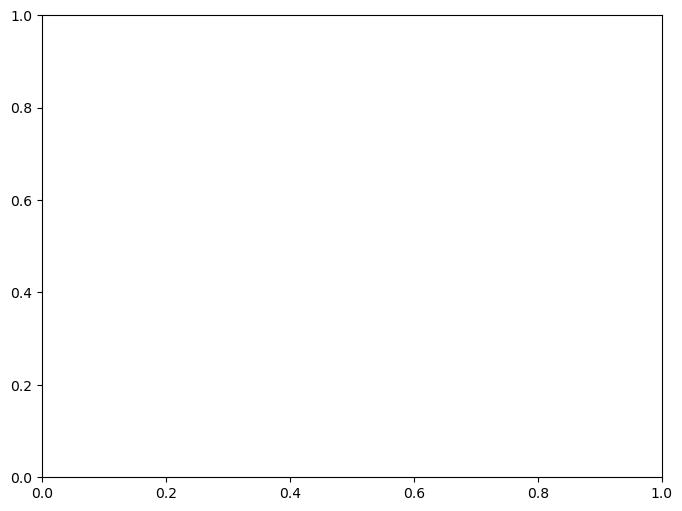

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el conjunto (I)
params_I = {
    "b": np.array([[0.2, 0.6], [1.3, 0.7]]),
    "c": np.array([3.0, 3.0]),
    "p": np.array([0.7, 1.1]),
    "rho": np.array([0.4, 0.5]),
    "q1": 0.2,
    "q2": 0.6,
    "mu": 0.07,
    "sigma": 0.21,
    "r": 0.03,
    "lambda_": 0.1
}

# Parámetros para el conjunto (II)
params_II = {
    "b": np.array([[0.2, 0.3], [0.4, 0.6]]),
    "c": np.array([2.4, 1.7]),
    "p": np.array([1.3, 0.8]),
    "rho": np.array([-0.2, 0.3]),
    "q1": 0.2,
    "q2": 0.7,
    "mu": 0.07,
    "sigma": 0.21,
    "r": 0.03,
    "lambda_": 0.15
}

# Funciones h1 y h2 definidas utilizando los parámetros
def h1(k, params):
    b, c, p, rho, q1, q2, mu, sigma, r, lambda_ = params.values()
    term1 = p[0] + (mu - r) / sigma * np.linalg.norm(np.dot(b, rho))**2
    term2 = -eta * np.dot(b, np.dot(np.eye(2) - np.outer(rho, rho), b.T)) * k**2
    additional_term = -lambda_ * (
        c[0] * q1 / (1 - k * c[0])**eta +
        c[0] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta
    )
    return term1 + term2 + additional_term

def h2(k, params):
    b, c, p, rho, q1, q2, mu, sigma, r, lambda_ = params.values()
    term1 = p[1] + (mu - r) / sigma * np.linalg.norm(np.dot(b, rho))**2
    term2 = -eta * np.dot(b, np.dot(np.eye(2) - np.outer(rho, rho), b.T)) * k**2
    additional_term = -lambda_ * (
        c[1] * q2 / (1 - k * c[1])**eta +
        c[1] * (1 - (q1 + q2)) / (1 - (k * c[0] + k**2 * c[1]))**eta
    )
    return term1 + term2 + additional_term

